In [137]:
# Import the necessary files
import pandas as pd

In [150]:
# Read the tables
tables = pd.read_html("https://en.wikipedia.org/wiki/1500_metres_world_record_progression")
table = tables[1]

In [139]:
# Demonstrate how tables look like with indices etc

In [151]:
# Read times and dates from one table only
times=table['Time']
dates=table['Date']

In [152]:
# Pick one record set
import numpy as np
n_records = len(times)
years = np.zeros(n_records) # create zero years
seconds = np.zeros(n_records) # create zero years
for i in range(n_records):   
    years[i] = datetime.datetime.strptime(dates[i], '%Y-%m-%d').year
    tmp = times[i].replace("+","0").split(':')
    seconds[i] = float(tmp[0])*60+float(tmp[1])

(1910.0, 2010.0, 200.0, 240.0)

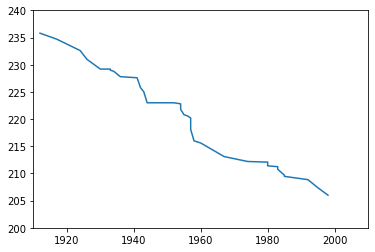

In [153]:
import matplotlib.pyplot as plt
plt.plot(years, seconds)
plt.axis([1910,2010,200,240])

In [134]:
date.year

1912